# 0. movie-contents-based

* https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset
* 영화의 overview(설명)을 가지고 유사도 구하기

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import os

## 데이터 불러오기

In [ ]:
base_path = "data/movies"
os.listdir(base_path)

['links_small.csv',
 'links.csv',
 'credits.csv',
 'movies_metadata.csv',
 'ratings.csv',
 'ratings_small.csv',
 'keywords.csv']

In [ ]:
df = pd.read_csv(f"{base_path}/movies_metadata.csv", low_memory=False)
df.shape

(45466, 24)

In [ ]:
df.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0


# 1. 데이터 셋 만들기

## Valid Data

In [ ]:
# overview 가 결측치가 아닌 것만 사용하기
df = df[df["overview"].notnull()].copy()
df.shape

(44512, 24)

In [ ]:
# 샘플링하기
df = df.sample(2000, random_state=42).copy()
df.shape

(2000, 24)

## TF-IDF


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfvect = TfidfVectorizer(max_features=20000)
tfidfvect

TfidfVectorizer(max_features=20000)

In [ ]:
tfidf_overview = tfidfvect.fit_transform(df["overview"])
tfidf_overview

<2000x15359 sparse matrix of type '<class 'numpy.float64'>'
	with 84219 stored elements in Compressed Sparse Row format>

In [ ]:
tfidfvect.get_feature_names_out()

array(['00', '000', '007', ..., '주식회사', '찾기', '첫사랑'], dtype=object)

In [ ]:
df_tfidf = pd.DataFrame(tfidf_overview.toarray(), columns=tfidfvect.get_feature_names_out())
df_tfidf

,00,000,007,09,10,100,108,11,1183,12,...,чеховского,что,шкафу,этом,ようなもの,患者さんとその世界,水俣,주식회사,찾기,첫사랑
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.212722,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.122909,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1998,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 2. 유사도


## 코사인 유사도

In [ ]:
# cosine_similarity 불러오기
from sklearn.metrics.pairwise import cosine_similarity
cosine_matrix = cosine_similarity(tfidf_overview, tfidf_overview)
cosine_matrix

array([[1.        , 0.01077789, 0.00640325, ..., 0.02511254, 0.01460233,
        0.        ],
       [0.01077789, 1.        , 0.04377587, ..., 0.05025856, 0.04773024,
        0.02702719],
       [0.00640325, 0.04377587, 1.        , ..., 0.04239767, 0.02726359,
        0.0183672 ],
       ...,
       [0.02511254, 0.05025856, 0.04239767, ..., 1.        , 0.04435692,
        0.        ],
       [0.01460233, 0.04773024, 0.02726359, ..., 0.04435692, 1.        ,
        0.01774577],
       [0.        , 0.02702719, 0.0183672 , ..., 0.        , 0.01774577,
        1.        ]])

<AxesSubplot: >

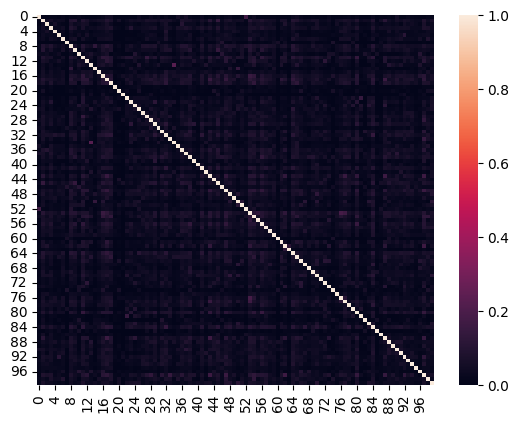

In [ ]:
sns.heatmap(cosine_matrix[:100, :100])

In [ ]:
# idx = df.index[0]
df["title"].unique()

array(["All Tomorrow's Parties", 'Troy', 'Variety', ..., 'Man vs. Snake',
       'Whisper', 'Big Muddy'], dtype=object)

In [ ]:
df_cosine = pd.DataFrame(cosine_matrix, index=df.index, columns=df.index)
df_cosine.head(2)

,15605,7291,14582,34668,44660,11163,40205,26168,19389,25067,...,40911,7548,9583,6585,3723,10089,35950,40784,16014,31436
15605,1.000000,0.010778,0.006403,0.015324,0.013505,0.006983,0.015831,0.000000,0.017305,0.011909,...,0.004823,0.013688,0.000000,0.000000,0.002109,0.006960,0.016346,0.025113,0.014602,0.000000
7291,0.010778,1.000000,0.043776,0.057822,0.027442,0.036187,0.033055,0.007308,0.087219,0.094002,...,0.049051,0.048454,0.027741,0.043108,0.036144,0.065055,0.036559,0.050259,0.047730,0.027027


In [ ]:
df["title"].unique()

array(["All Tomorrow's Parties", 'Troy', 'Variety', ..., 'Man vs. Snake',
       'Whisper', 'Big Muddy'], dtype=object)

In [ ]:
title = "Harry Potter"
# title = "Troy"
display(df.loc[df["title"].notnull() & df["title"].str.contains(title), "title"])
movie_id = df.loc[df["title"].notnull() & df["title"].str.contains(title), "title"].index[-1]
movie_id

16128    Harry Potter and the Deathly Hallows: Part 1
5678          Harry Potter and the Chamber of Secrets
Name: title, dtype: object

5678

In [ ]:
sim_cos = df_cosine[movie_id].nlargest(10)
sim_cos

5678     1.000000
16128    0.283075
26946    0.193453
3951     0.136489
27326    0.120640
9269     0.109662
9928     0.107327
33653    0.105458
35311    0.103020
16431    0.092995
Name: 5678, dtype: float64

In [ ]:
df_sim_cos = df.loc[sim_cos.index, ["title", "overview"]].join(sim_cos)
df_sim_cos

,title,overview,5678
5678,Harry Potter and the Chamber of Secrets,"Ignoring threats to his life, Harry returns to...",1.000000
16128,Harry Potter and the Deathly Hallows: Part 1,"Harry, Ron and Hermione walk away from their l...",0.283075
26946,I Love Trouble,A wealthy man hires a detective to investigate...,0.193453
3951,"Harry, He's Here To Help",Harry knew Michel in high school; they meet ag...,0.136489
27326,Silent Partner,"Gordon Patrick, a young CIA analyst is assigne...",0.120640
9269,Gojoe: Spirit War Chronicle,"Benkei, a master fighter and killer, vows neve...",0.109662
9928,Steppenwolf,In the bourgeois circles of Europe after the G...,0.107327
33653,Paris Holiday,Comedian Bob Hunter is aided by his French cou...,0.105458
35311,Mr. Miracle,Heavenly angel Harry Mills is sent to Earth on...,0.103020
16431,Who Is Harry Nilsson (And Why Is Everybody Tal...,The documentary explores the enigmatic life an...,0.092995


### 유사도 결과를 데이터프레임으로 반환하는 함수 만들기

In [ ]:
def find_movie(title, sim_matrix, df):
    try:
        movie_id = df.loc[df["title"].notnull() &
                          df["title"].str.contains(title), "title"].index[0]
        df_sim = pd.DataFrame(sim_matrix, index=df.index, columns=df.index)
        sim = df_sim[movie_id].nlargest(10)
        df_sim = df.loc[sim.index, ["title", "overview"]].join(sim)
        return df_sim
    except:
        return "추천할 영화 없음"

In [ ]:
title = "Star Wars"
find_movie(title, cosine_matrix, df)

,title,overview,5244
5244,Star Wars: Episode II - Attack of the Clones,"Ten years after the invasion of Naboo, the gal...",1.000000
12924,Oh! What a Lovely War,A movie about the First World War based on a s...,0.158850
40660,The Brain Eaters,"Strange things are happening in Riverdale, Ill...",0.135422
11515,Don Camillo,In a village of the Po valley where the earth ...,0.132863
28079,Freedom Song,Freedom Song (2000) is a made-for-TV film base...,0.127500
34088,The Absent One,In 1994 two young twins are found brutally mur...,0.126889
18411,14 Blades,"Trained in clandestine combat from childhood, ...",0.121802
7322,Paperhouse,Anna is becoming lost in the loneliness of her...,0.119797
23007,The Artist and the Model,"The story of a famous old sculptor, weary of l...",0.119473
14979,Blackwoods,Matt is haunted by the death of a girl from a ...,0.114683


## 유클리디안 유사도

In [ ]:
# sklearn.metrics.pairwise에서 euclidean_distances 불러오기
# 1 에 유사도를 구한 값을 나눠주기
from sklearn.metrics.pairwise import euclidean_distances

ec_matrix = 1 / euclidean_distances(tfidf_overview, tfidf_overview)
ec_matrix

/var/folders/nt/890yxml924n92lgx71fwg56w0000gn/T/ipykernel_19281/1791634661.py:5: RuntimeWarning: divide by zero encountered in divide
  ec_matrix = 1 / euclidean_distances(tfidf_overview, tfidf_overview)


array([[       inf, 0.71094842, 0.7093816 , ..., 0.71615621, 0.71232672,
        0.70710678],
       [0.71094842,        inf, 0.72311131, ..., 0.72557499, 0.72461114,
        0.7168605 ],
       [0.7093816 , 0.72311131,        inf, ..., 0.72259076, 0.7169476 ,
        0.71369141],
       ...,
       [0.71615621, 0.72557499, 0.72259076, ...,        inf, 0.72333111,
        0.70710678],
       [0.71232672, 0.72461114, 0.7169476 , ..., 0.72333111,        inf,
        0.71346562],
       [0.70710678, 0.7168605 , 0.71369141, ..., 0.70710678, 0.71346562,
               inf]])

<AxesSubplot: >

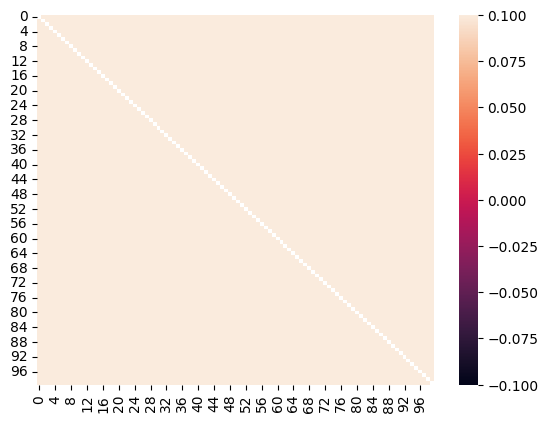

In [ ]:
sns.heatmap(ec_matrix[:100, :100])

In [ ]:
title = "Star Wars"
find_movie(title, ec_matrix, df)

,title,overview,5244
5244,Star Wars: Episode II - Attack of the Clones,"Ten years after the invasion of Naboo, the gal...",inf
12924,Oh! What a Lovely War,A movie about the First World War based on a s...,0.770989
40660,The Brain Eaters,"Strange things are happening in Riverdale, Ill...",0.760472
11515,Don Camillo,In a village of the Po valley where the earth ...,0.759349
28079,Freedom Song,Freedom Song (2000) is a made-for-TV film base...,0.757011
34088,The Absent One,In 1994 two young twins are found brutally mur...,0.756746
18411,14 Blades,"Trained in clandestine combat from childhood, ...",0.754551
7322,Paperhouse,Anna is becoming lost in the loneliness of her...,0.753691
23007,The Artist and the Model,"The story of a famous old sculptor, weary of l...",0.753553
14979,Blackwoods,Matt is haunted by the death of a girl from a ...,0.751511


## 피어슨 유사도


In [ ]:
tfidf_overview

<2000x15359 sparse matrix of type '<class 'numpy.float64'>'
	with 84219 stored elements in Compressed Sparse Row format>

In [ ]:
# np.corrcoef
pearson_sim = np.corrcoef(tfidf_overview.toarray())
pearson_sim

array([[ 1.00000000e+00,  9.10285107e-03,  5.51535795e-03, ...,
         2.36572471e-02,  1.33381584e-02, -8.77799630e-04],
       [ 9.10285107e-03,  1.00000000e+00,  4.19478112e-02, ...,
         4.71798778e-02,  4.50914180e-02,  2.51936816e-02],
       [ 5.51535795e-03,  4.19478112e-02,  1.00000000e+00, ...,
         4.07742128e-02,  2.58456671e-02,  1.73881001e-02],
       ...,
       [ 2.36572471e-02,  4.71798778e-02,  4.07742128e-02, ...,
         1.00000000e+00,  4.20139394e-02, -1.67542441e-03],
       [ 1.33381584e-02,  4.50914180e-02,  2.58456671e-02, ...,
         4.20139394e-02,  1.00000000e+00,  1.63386243e-02],
       [-8.77799630e-04,  2.51936816e-02,  1.73881001e-02, ...,
        -1.67542441e-03,  1.63386243e-02,  1.00000000e+00]])

In [ ]:
title = "Harry Potter"
find_movie(title, pearson_sim, df)

,title,overview,16128
16128,Harry Potter and the Deathly Hallows: Part 1,"Harry, Ron and Hermione walk away from their l...",1.000000
5678,Harry Potter and the Chamber of Secrets,"Ignoring threats to his life, Harry returns to...",0.282070
3951,"Harry, He's Here To Help",Harry knew Michel in high school; they meet ag...,0.136436
16431,Who Is Harry Nilsson (And Why Is Everybody Tal...,The documentary explores the enigmatic life an...,0.120222
34728,What Men Still Talk About,"A year later the men are still talking, but th...",0.107708
35311,Mr. Miracle,Heavenly angel Harry Mills is sent to Earth on...,0.102168
40923,Mr. Right,Louise thought she’d met the man of her dreams...,0.096545
38630,Frozen Stiff,The basic plot revolves around drug dealer Lim...,0.092112
17575,Twixt,A writer with a declining career arrives in a ...,0.090439
1128,Bad Moon,One man's struggle to contain the curse he hid...,0.090158


## 자카드 유사도

In [ ]:
# sklearn.metrics.pairwise 에서 pairwise_distances 불러오기
# metric='jaccard'
from sklearn.metrics.pairwise import pairwise_distances

jac_matrix = 1 - pairwise_distances(tfidf_overview.toarray(), metric="jaccard")
jac_matrix

/Users/corazzon/codes/notebook/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:2008: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


array([[1.        , 0.02380952, 0.03225806, ..., 0.04918033, 0.03846154,
        0.        ],
       [0.02380952, 1.        , 0.05882353, ..., 0.05172414, 0.07692308,
        0.02325581],
       [0.03225806, 0.05882353, 1.        , ..., 0.0625    , 0.07407407,
        0.03030303],
       ...,
       [0.04918033, 0.05172414, 0.0625    , ..., 1.        , 0.05882353,
        0.        ],
       [0.03846154, 0.07692308, 0.07407407, ..., 0.05882353, 1.        ,
        0.01818182],
       [0.        , 0.02325581, 0.03030303, ..., 0.        , 0.01818182,
        1.        ]])

<AxesSubplot: >

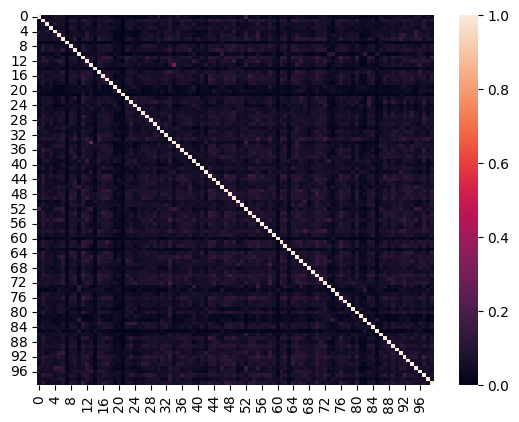

In [ ]:
sns.heatmap(jac_matrix[:100, :100])

In [ ]:
find_movie(title, jac_matrix, df)

,title,overview,16128
16128,Harry Potter and the Deathly Hallows: Part 1,"Harry, Ron and Hermione walk away from their l...",1.000000
12114,Beaufort,"BEAUFORT tells the story of LIRAZ LIBERTI, the...",0.152941
3723,Ilsa: She Wolf of the SS,Ilsa is a warden at a Nazi death camp that con...,0.142857
6286,"Objective, Burma!",A group of men parachute into Japanese-occupie...,0.137500
18913,The Swell Season,The world fell in love with Glen Hansard and M...,0.136364
4284,The Thing with Two Heads,A rich but racist man is dying and hatches an ...,0.136364
18840,Goodbye First Love,A 15-year-old discovers the joys and heartache...,0.135593
41826,The Darkest Dawn,"Evacuated from their home, two teenage sisters...",0.135593
20434,The Devil's Tomb,Captain Mack leads an elite military unit on a...,0.134328
7804,Memphis Belle,"The ""Memphis Belle"" is a World War II bomber, ...",0.134146
